In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [24]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

Education_df = pd.read_sql_query('select * from useducation',con=engine)


engine.dispose()

## Missing values:

In [25]:
Education_df.isna().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                           True
TOTAL_REVENUE                    True
FEDERAL_REVENUE                  True
STATE_REVENUE                    True
LOCAL_REVENUE                    True
TOTAL_EXPENDITURE                True
INSTRUCTION_EXPENDITURE          True
SUPPORT_SERVICES_EXPENDITURE     True
OTHER_EXPENDITURE                True
CAPITAL_OUTLAY_EXPENDITURE       True
GRADES_PK_G                      True
GRADES_KG_G                      True
GRADES_4_G                       True
GRADES_8_G                       True
GRADES_12_G                      True
GRADES_1_8_G                     True
GRADES_9_12_G                    True
GRADES_ALL_G                     True
AVG_MATH_4_SCORE                 True
AVG_MATH_8_SCORE                 True
AVG_READING_4_SCORE              True
AVG_READING_8_SCORE              True
dtype: bool

In [26]:
Education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [27]:
Education_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [31]:
fill_list=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

                                                            

In [32]:
df2=Education_df.copy()
for c in fill_list:
    df2.loc[:,c]=df2.loc[:,c].fillna(df2.loc[:,c].mean())


In [33]:
df2.isna().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                          False
TOTAL_REVENUE                   False
FEDERAL_REVENUE                 False
STATE_REVENUE                   False
LOCAL_REVENUE                   False
TOTAL_EXPENDITURE               False
INSTRUCTION_EXPENDITURE         False
SUPPORT_SERVICES_EXPENDITURE    False
OTHER_EXPENDITURE               False
CAPITAL_OUTLAY_EXPENDITURE      False
GRADES_PK_G                     False
GRADES_KG_G                     False
GRADES_4_G                      False
GRADES_8_G                      False
GRADES_12_G                     False
GRADES_1_8_G                    False
GRADES_9_12_G                   False
GRADES_ALL_G                    False
AVG_MATH_4_SCORE                False
AVG_MATH_8_SCORE                False
AVG_READING_4_SCORE             False
AVG_READING_8_SCORE             False
dtype: bool

### 1. Consider the two variables TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

## Dropping Outliers

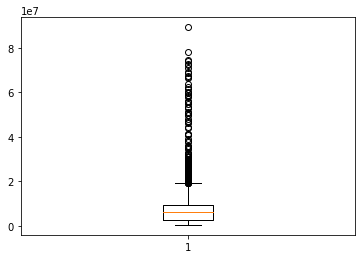

In [36]:
plt.boxplot(df2['TOTAL_REVENUE'])
plt.show()

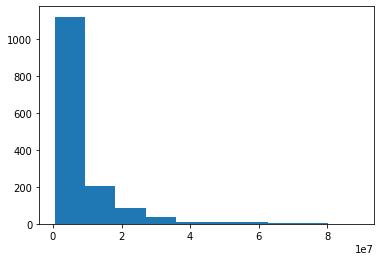

In [39]:
plt.hist(df2['TOTAL_REVENUE'])
plt.show()

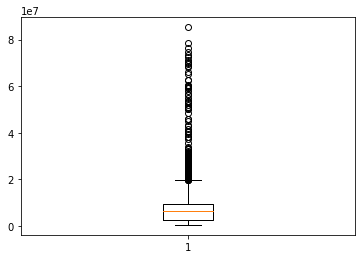

In [38]:
plt.boxplot(df2['TOTAL_EXPENDITURE'])
plt.show()

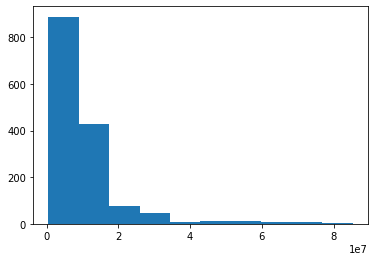

In [40]:
plt.hist(df2['TOTAL_EXPENDITURE'])
plt.show()

## 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this lesson to eliminate them and validate that there are no outlier values after you handle them. 

In [47]:
df2['TOTAL_EXPENDITURE'].sort_values()

94        481665.0
146       525289.0
34        553732.0
87        588983.0
42        593126.0
           ...    
784     73225422.0
891     74766086.0
836     76618865.0
1203    78365958.0
1254    85320133.0
Name: TOTAL_EXPENDITURE, Length: 1492, dtype: float64

In [42]:
df2['TOTAL_EXPENDITURE'].median()

6520223.5

In [43]:
df2['TOTAL_EXPENDITURE'].mean()

9196680.868749946

In [80]:
df3=df2['TOTAL_EXPENDITURE'].sort_values()

In [81]:
df3=df3[:-150]

In [82]:
df3

94        481665.0
146       525289.0
34        553732.0
87        588983.0
42        593126.0
           ...    
1260    19158388.0
843     19172087.0
148     19224149.0
482     19337580.0
659     19375400.0
Name: TOTAL_EXPENDITURE, Length: 1342, dtype: float64

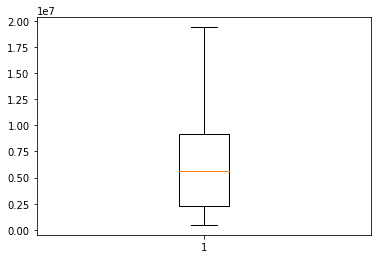

In [83]:
plt.boxplot(df3)
plt.show()

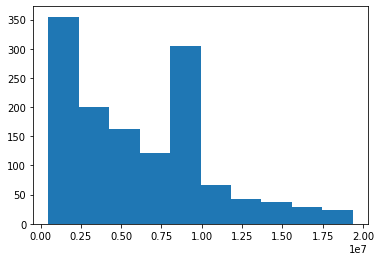

In [84]:
plt.hist(df3)
plt.show()

In [85]:
df2['TOTAL_REVENUE'].sort_values()

94        465650.0
146       507927.0
42        551668.0
34        559481.0
87        580148.0
           ...    
784     72516936.0
891     73958896.0
836     74626928.0
1203    78248042.0
1254    89217262.0
Name: TOTAL_REVENUE, Length: 1492, dtype: float64

In [86]:
df2['TOTAL_REVENUE'].mean()

9092081.858593645

In [98]:
df4=df2['TOTAL_EXPENDITURE'].sort_values()

In [99]:
df4=df4[:-150]

In [100]:
df4 

94        481665.0
146       525289.0
34        553732.0
87        588983.0
42        593126.0
           ...    
1260    19158388.0
843     19172087.0
148     19224149.0
482     19337580.0
659     19375400.0
Name: TOTAL_EXPENDITURE, Length: 1342, dtype: float64

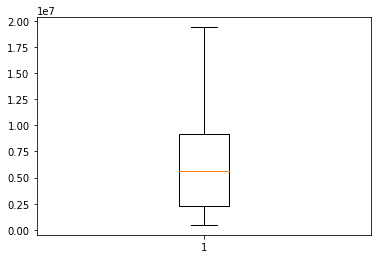

In [101]:
plt.boxplot(df4)
plt.show()

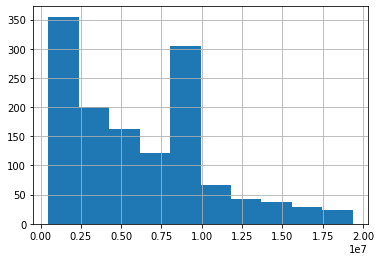

In [102]:
df4.hist()

## LOG Transport


In [116]:
from numpy import inf
TOTAL_REVENUE=np.log(df2['TOTAL_REVENUE'])
TOTAL_REVENUE[TOTAL_REVENUE==-inf]=0
print(TOTAL_REVENUE)

0       14.800911
1       13.863911
2       14.996648
3       14.353149
4       17.083558
          ...    
1487    16.022914
1488    16.022914
1489    16.022914
1490    16.022914
1491    16.022914
Name: TOTAL_REVENUE, Length: 1492, dtype: float64


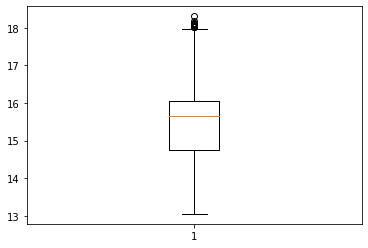

In [117]:
plt.boxplot(TOTAL_REVENUE)
plt.show()

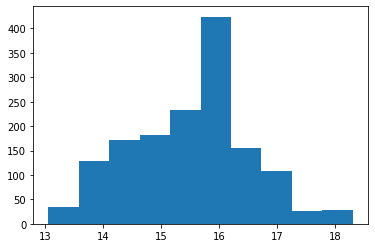

In [118]:
plt.hist(TOTAL_REVENUE)
plt.show()

In [119]:
TOTAL_EXPENDITURE=np.log(df2['TOTAL_EXPENDITURE'])
TOTAL_EXPENDITURE[TOTAL_EXPENDITURE==-inf]=0
print(TOTAL_EXPENDITURE)

0       14.791502
1       13.787613
2       15.039751
3       14.371131
4       17.116476
          ...    
1487    16.034353
1488    16.034353
1489    16.034353
1490    16.034353
1491    16.034353
Name: TOTAL_EXPENDITURE, Length: 1492, dtype: float64


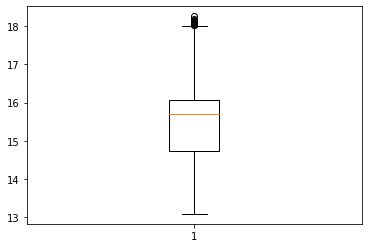

In [120]:
plt.boxplot(TOTAL_EXPENDITURE)
plt.show()

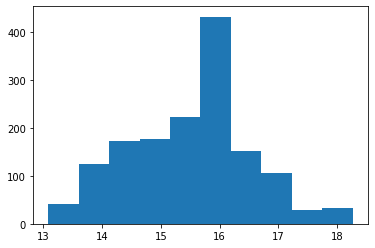

In [121]:
plt.hist(TOTAL_EXPENDITURE)
plt.show()

## LIMIT outlier by Winsorization: 

In [129]:
from scipy.stats.mstats import winsorize
win_TOTAL_REVENUE= winsorize(df2['TOTAL_REVENUE'],(0,0.15))

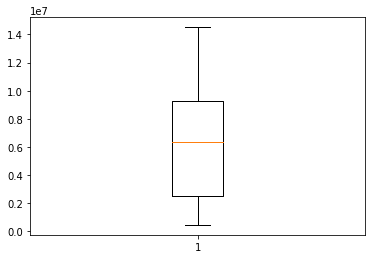

In [130]:
plt.boxplot(win_TOTAL_REVENUE)
plt.show()

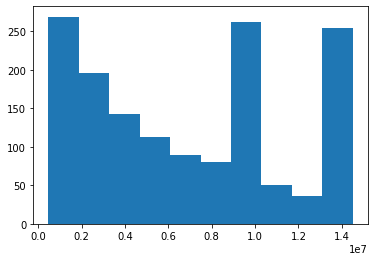

In [131]:
plt.hist(win_TOTAL_REVENUE)
plt.show()

In [126]:
win_TOTAL_EXPENDITURE=winsorize(df2['TOTAL_EXPENDITURE'],(0,0.1))

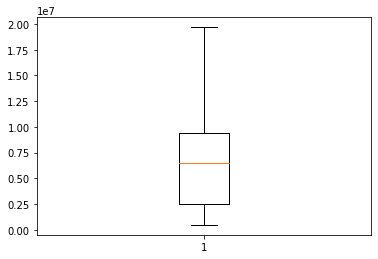

In [127]:
plt.boxplot(win_TOTAL_EXPENDITURE)
plt.show()

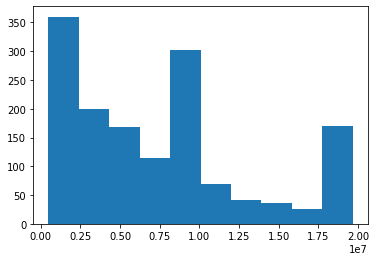

In [128]:
plt.hist(win_TOTAL_EXPENDITURE)
plt.show()

## 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable. 

In [134]:
budget_deficit=df2.loc[:,'TOTAL_EXPENDITURE']-df2.loc[:,'TOTAL_REVENUE']

In [135]:
budget_deficit

0       -25087.000000
1       -77103.000000
2       143501.000000
3        31063.000000
4       878807.000000
            ...      
1487    104599.010156
1488    104599.010156
1489    104599.010156
1490    104599.010156
1491    104599.010156
Length: 1492, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffa0918de10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffa09373910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffa0918d210>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffa0918ded0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffa0937f890>],
 'means': []}

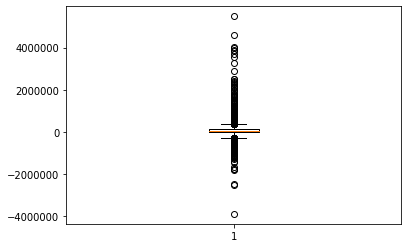

In [137]:
plt.boxplot(budget_deficit)

In [139]:
from scipy.stats.mstats import winsorize


In [143]:
win_budget_deficit=winsorize(budget_deficit,(0.1,0.15))

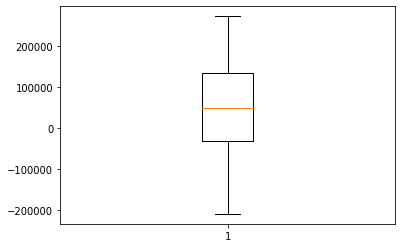

In [144]:
plt.boxplot(win_budget_deficit)
plt.show()

## 4. Now create another variable by subtracting TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them. 

In [145]:
budget=win_TOTAL_EXPENDITURE-win_TOTAL_REVENUE

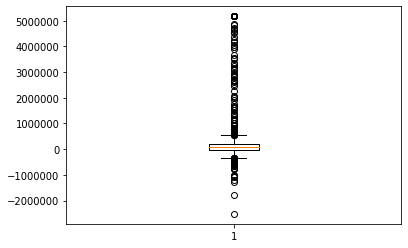

In [146]:
plt.boxplot(budget)
plt.show()

In [149]:
from scipy.stats import zscore

score=zscore(budget)
print(len ((np.where(score>1)[0])))

185


In [150]:
score=zscore(budget_deficit)
print(len ((np.where(score>1)[0])))

91


## Part 4 has more outliers

## 5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences? 

In [151]:
q75,q25=np.percentile(budget,[75,25])
iqr=q75-q25

In [154]:
for th in np.arange(1,4,0.5):
    min_val=q25-(iqr*th)
    max_val=q75+(iqr*th)
    print('The score threshold is :{}'.format(th))
    print('Number of Outliers are : {}'.format(len((np.where((budget>max_val)| (budget<min_val))[0]))))

The score threshold is :1.0
Number of Outliers are : 334
The score threshold is :1.5
Number of Outliers are : 285
The score threshold is :2.0
Number of Outliers are : 251
The score threshold is :2.5
Number of Outliers are : 228
The score threshold is :3.0
Number of Outliers are : 218
The score threshold is :3.5
Number of Outliers are : 213


In [155]:
q75,q25=np.percentile(budget_deficit,[75,25])
iqr=q75-q25
for th in np.arange(1,4,0.5):
    min_val=q25-(iqr*th)
    max_val=q75+(iqr*th)
    print('The score threshold is :{}'.format(th))
    print('Number of Outliers are : {}'.format(len((np.where((budget_deficit>max_val)| (budget_deficit<min_val))[0]))))

The score threshold is :1.0
Number of Outliers are : 358
The score threshold is :1.5
Number of Outliers are : 275
The score threshold is :2.0
Number of Outliers are : 231
The score threshold is :2.5
Number of Outliers are : 182
The score threshold is :3.0
Number of Outliers are : 147
The score threshold is :3.5
Number of Outliers are : 124


## 6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question? 

### I prefer winzorization its easier to use and eliminate all outliers. Log transform did not eliminate all of them.